In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11431,Super built-up Area,Ready To Move,Hegde Nagar,3 BHK,Dhniail,1168,2.0,1.0,68.00
1707,Super built-up Area,Ready To Move,Marathahalli,3 BHK,PadgeOa,1678,3.0,3.0,70.00
3191,Plot Area,Ready To Move,Vyalikaval,7 Bedroom,NaN,1000,7.0,3.0,160.00
3214,Built-up Area,Ready To Move,Kada Agrahara,3 BHK,ARineha,2220,4.0,2.0,65.00
3904,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1224,2.0,3.0,39.20
7738,Super built-up Area,Ready To Move,Subramanyapura,2 BHK,NaN,958,2.0,1.0,34.49
11270,Super built-up Area,Ready To Move,Ardendale,3 BHK,SoystAm,1777.26,3.0,2.0,92.00
11074,Built-up Area,Ready To Move,Yelahanka New Town,2 BHK,KHatsFl,860,1.0,2.0,31.00
12695,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Prhna S,1128,2.0,1.0,60.00
11922,Built-up Area,18-Apr,Sarjapur Road,2 BHK,NaN,1216,2.0,2.0,70.00


In [4]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
data['bath'].fillna(data['bath'].mean(), inplace=True)
data['balcony'].fillna(data['balcony'].mean(), inplace=True)
data['size'].fillna(data['size'].mode()[0], inplace=True)
data['location'].fillna(data['location'].mode()[0], inplace=True)
data.drop('society', axis=1, inplace=True) #so many values are missing here 


C:\Users\Rishav\AppData\Local\Temp\ipykernel_21148\3130318460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bath'].fillna(data['bath'].mean(), inplace=True)
C:\Users\Rishav\AppData\Local\Temp\ipykernel_21148\3130318460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [6]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [7]:
print(data.describe())

               bath       balcony         price
count  13320.000000  13320.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.337777      0.798360    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB
None


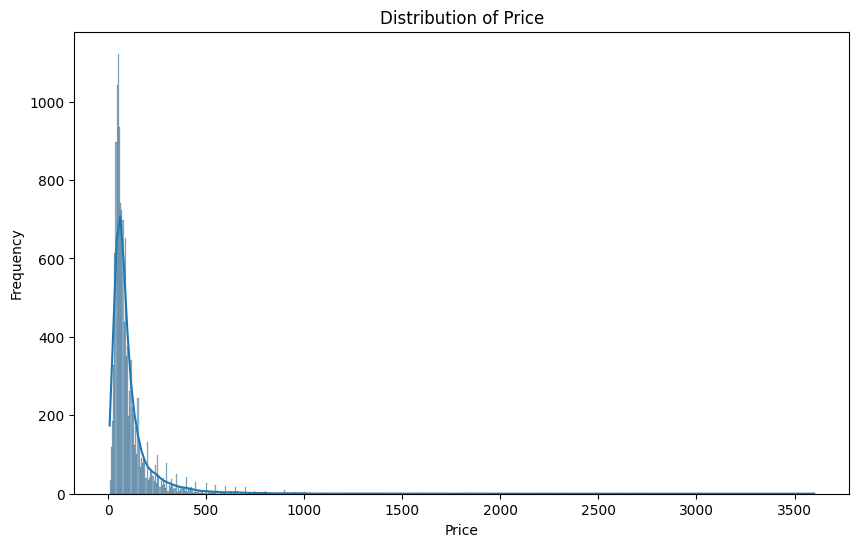

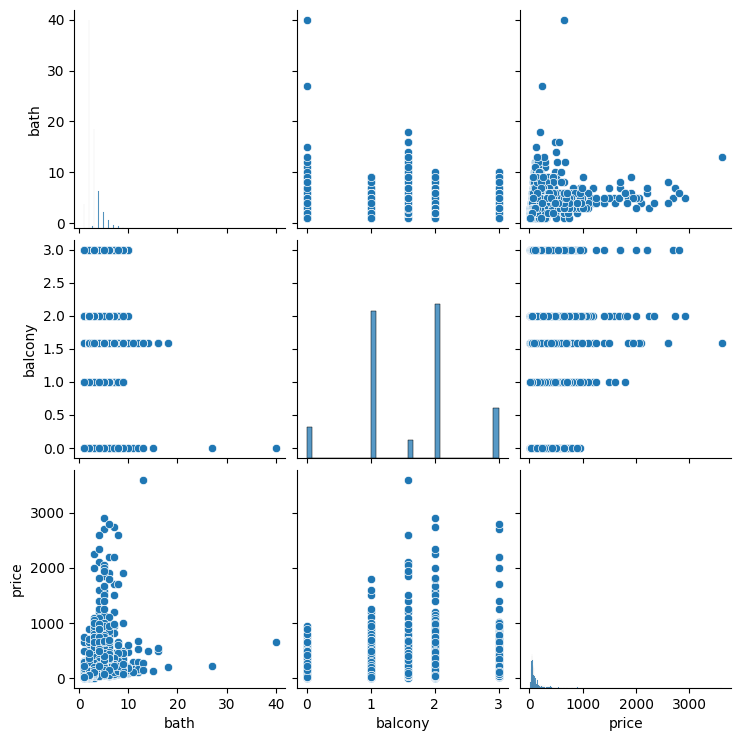

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.pairplot(data[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [10]:
data.duplicated().sum()

568

In [11]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['area_type', 'availability', 'location', 'size'], drop_first=True)


In [12]:
data.drop_duplicates(inplace=True)


In [13]:
data.duplicated().sum()

0

In [14]:

invalid_rows = data[data['total_sqft'].str.contains('Sq. Meter')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Perch')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Sq. Yards')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Acres')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Grounds')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Cents')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Guntha')]
data.drop(invalid_rows.index, inplace=True) 

#Function to convert range values to average
def convert_range_to_avg(value):
    if '-' in value:
        start, end = value.split('-')
        return (float(start) + float(end)) / 2
    else:
        return float(value)

data['total_sqft'] = data['total_sqft'].apply(convert_range_to_avg)


scaler = StandardScaler()
num_cols = ['total_sqft', 'bath', 'balcony']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12706 entries, 0 to 13318
Columns: 1421 entries, total_sqft to size_9 Bedroom
dtypes: bool(1417), float64(4)
memory usage: 17.7 MB


In [16]:
X = data.drop('price', axis=1)
y = data['price']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_regressor = SVR(kernel='linear')

svm_regressor.fit(X_train, y_train)

y_pred = svm_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 18530.4526826842
